# Tracking Trends in Sleep Quality and Lifestyle Habits

## Summary

As a college student juggling a busy academic schedule, personal health, and fitness, I wanted to investigate various trends and relationships pertaining to lifestyle choices and sleep quality. I believe that sleep has shifted into more of an "extra" benefit rather than a priority for most people, especially in college, where many students struggle to balance quality sleep with a busy lifestyle. As such, I wanted to look into various factors that impact how well an individual sleeps. My findings will help provide information for people seeking to improve their sleep by identifying and analyzing relationships between sleep quality metrics based on a variety of lifestyle factors.

## Research Questions
**1.** What is the best time to fall asleep for optimal sleep quality and length?

   Result: 10:00 PM for optimal sleep quality (statistically insignificant) and 11:00 PM for maximal sleep length (statistically significant).

   
**2.** What lifestyle factors best predict sleep quality and is the relationship best described with a linear or decision tree model? (Factors to consider: `Exercise`, `Caffeine Intake`, `Sleep Start Time`, `Sleep End Time`, `Screentime Before Bed`, `Work Hours`)
   
   Result: The most accurate feature was identified to be `Work Hours` and I found no statistically significant difference between a linear and decision tree model.

   
**3.** Based on sleep patterns (`Sleep Start Time`, `Sleep End Time`, `Total Sleep Hours`), can mood and productivity levels be accurately predicted?
   
   Result: Using a decision tree regressor, I found that mood and productivity levels can not be accurately predicted based on sleep patterns.

## Challenge Goals

**Statistical Hypothesis Testing:**
- I want to verify that my findings are statistically significant so implementing statistical hypothesis testing will be an effective, formal way to verify my results. Since my research questions are about predicting trends and identifying relationships, statistical hypothesis testing will be a very effective way to prove my results are statistically significant and meaningful.

**Utilizing a New Library:**
- Using a library for interactive plots could be helpful, especially since some my research questions are heavily reliant on the use of plots. With a library such as Altair to create interactive plots, I can create a more user-friendly and visually appealing way to present and analyze my findings in graphical formats.
- I will also be utilizing Scipy Stats, which is a library that was not mentioned in class, to run my statistical hypothesis tests.


## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [1]:
your_name = "Eric Shi"
sources = [
    "Machine Learning Section (jupyter.rttl.uw.edu/2025-winter-cse-163-a/user/eshi1685/lab/tree/COURSE_MATERIALS/sections/machine-learning-practice.ipynb)",
    "Model Evaluation Lecture (jupyter.rttl.uw.edu/2025-winter-cse-163-a/user/eshi1685/lab/tree/COURSE_MATERIALS/lectures/model-evaluation.ipynb)",
    "Data Visualization Lecture (jupyter.rttl.uw.edu/2025-winter-cse-163-a/user/eshi1685/lab/tree/COURSE_MATERIALS/lectures/data-visualization.ipynb)",
    "Pokemon Assessment (jupyter.rttl.uw.edu/2025-winter-cse-163-a/user/eshi1685/lab/tree/COURSE_MATERIALS/assessments/pokemon.ipynb)", 
    "https://altair-viz.github.io/user_guide/marks/bar.html (Search Query: Altair bar graph markup)",
    "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html (Search Query: ANOVA test Scipy Stats)" ,
    "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html (Search Query: T-test Scipy Stats)",
    "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html (Search Query: Chi Squared test scipy stats)",
    "https://www.freecodecamp.org/news/python-switch-statement-switch-case-example/ (Search Query: Switch Statement in Python)",
    "https://altair-viz.github.io/altair-viz-v4/user_guide/interactions.html (Search Query: use dropdown menu to filter categories altair scatterplot)",
    "https://stackoverflow.com/questions/57244390/how-to-add-a-subtitle-to-an-altair-generated-chart (Search Query: Add subtitle to altair plot)",
    "https://stackoverflow.com/questions/69272911/altair-chart-show-less-lines-in-the-grid (Search Query: Change tick count altair)",
    "https://altair-viz.github.io/user_guide/customization.html (Search Query: Specify axis limits altair)"
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting and Methods

**Link:** 
https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity
	
**Description:** 
This dataset is a CSV file and contains the following columns: `Date`, `Person_ID`,  `Age` (ranging from 18 to 60), `Gender` (Male, Female, or Other), `Sleep Start Time` (in 24-hour format), `Sleep End Time` (in 24-hour format), `Total Sleep Hours`, `Sleep Quality` (Self-reported on a scale from 1 (poor) to 10 (excellent)), `Exercise (mins/day)`, `Caffeine Intake (mg)`, `Screen Time Before Bed (mins)`, `Work Hours (hrs/day)`, `Productivity Score` (self-reported on a scale from 1 to 10), `Mood Score` (self-reported on a scale from 1 to 10), `Stress Level` (self-reported on a scale from 1 to 10). The data is clean and has no missing data. Thus, cleaning should not be an issue with this dataset. However, it may be important to note that the `Date` column has been dropped from the dataset due to it not being relevant for any of my research questions, meaning the column is never used in my code and only serves to take up extra memory if left in.

**Methods:**
I will mostly be using sklearn's various machine learning models such as linear regression and decision tree regressor models to make predictions and draw relationships between various columns of the dataset. In addition, I will be frequently conducting statistical hypothesis testing to verify that my findings are statistically significant. The tests I will be using are the ANOVA test to compare the means of two or more groups, D’Agostino and Pearson’s test to assess data normality, a T-test to compare the means of two groups, and a Chi-Squared test to check for differences between observed and expected categorical variables. Finally, I will be using a combination of number comparisons and visual plots/graphs to support my findings and draw certain conclusions. 


In [2]:
import pandas as pd
import seaborn as sns
import scipy as sp
import altair as alt
import doctest
import io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
sns.set_theme()

In [3]:
"""
This code cell loads in the sleep dataset and cleans up any unnecessary columns.

>>> sleep_data["Date"]
Traceback (most recent call last):
KeyError: 'Date'

>>> sleep_data_path.endswith(".csv")
True
"""
sleep_data_path = "sleep_cycle_productivity.csv"
sleep_data = pd.read_csv(sleep_data_path)
sleep_data = sleep_data.set_index("Person_ID")
sleep_data = sleep_data.drop(["Date"], axis=1) #Date column is not needed for my research
sleep_data

,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
Person_ID,,,,,,,,,,,,,
1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1


In [4]:
def format_sleep_times(sleep_data: pd.DataFrame):
    """
    Adds a new column to the dataset containing the "floored" "on-the-hour" format of sleep start times.
    For example, if an individual falls asleep at 8:13, the "floored" format is 8:00. 

    >>> format_sleep_times(sleep_data_test)["Sleep Start Time Floored"].to_list()
    ["8:00", "1:00", "2:00", "12:00"]
    """
    floored_values = np.floor(sleep_data["Sleep Start Time"])
    sleep_data["Sleep Start Time Floored"] = floored_values.astype("int").astype("str") + ":00"
    return sleep_data


format_sleep_times(sleep_data)[["Sleep Start Time Floored"]]

,Sleep Start Time Floored
Person_ID,
1860,23:00
1769,21:00
2528,22:00
8041,23:00
4843,21:00
...,...
5192,22:00
7134,21:00
6265,22:00


**Initialize testing dataframe:**

In [5]:
sleep_data_test = pd.read_csv(io.StringIO("""
Person_ID,Sleep Start Time,Sleep Quality,Total Sleep Hours 
1,8.23,7,7
13,1.45,8,8
124,2.00,2,8
12,12.34,3,6
"""))
sleep_data_test.set_index("Person_ID")

,Sleep Start Time,Sleep Quality,Total Sleep Hours
Person_ID,,,
1,8.23,7,7
13,1.45,8,8
124,2.00,2,8
12,12.34,3,6


## Results

## 1. What is the best time to fall asleep?
From the dataset, I found that individuals in the dataset who slept at 22:00 (or 10:00 PM) reported a slightly higher average sleep quality of 5.620 than the rest of the sleep times in the dataset (See Fig. 1). I also expected the higher average sleep quality score to be statistically significant due to its bar representation being visibly taller than the other bars. However, conducting an ANOVA statistical hypothesis test on the sleep dataset's `Sleep Quality` column yielded a p-value of roughly 0.50, meaning that the results are not statistically significant. As such, my research found that there is little connection between the time one falls asleep and their self-reported sleep quality. I also found that individuals in the dataset who slept at 23:00 (or 11:00 PM) reported a slightly higher average time asleep (in hours) of 7.047 hours (See Fig. 2). I also expected this to be a statistically significant observation. Conducting another ANOVA statistical hypothesis test on dataset's `Total Sleep Hours` column yielded a p-value of roughly 0.034, which is less than the chosen p-value threshold of 0.05, meaning the results were indeed statistically signifiant. Thus, it can be concluded the optimal time to fall asleep to maximize how long an individual sleeps is around 11:00 PM. 

I found it interesting that the optimal time to fall asleep to maximize sleep quality (10:00 PM) is different from the best time to fall asleep to maximize sleep length (11:00 PM). However, because I eventually found my results for Sleep Quality vs. Sleep Start Time to be statistically insignificant, the discrepancy can be potentially explained by simple variations in the data since `Sleep Quality` is a self reported metric. As such, it might not be as accurate as Sleep Length, which is a quantitative metric. As such, I am more inclined to believe that 11:00 PM is a more optimal time to fall alseep as opposed to 10:00 PM.

### Plot relationships between sleep length and sleep quality vs. sleep start time

In [6]:
def plot_sleep_time(sleep_data: pd.DataFrame) -> None:    
    """
    This function plots two bar graphs: one showing average self reported sleep quality for different
    floored sleep start times and another showing average sleep lengths for different floored sleep
    start times. The bar corresponding to the highest average values in each graph is highlighted
    green.
    """
    quality_vs_sleep_time = sleep_data.groupby("Sleep Start Time Floored")["Sleep Quality"].mean()
    quality_vs_sleep_time_df = quality_vs_sleep_time.to_frame().reset_index()
    quality_chart = alt.Chart(quality_vs_sleep_time_df).mark_bar(size=60).encode(
        alt.X("Sleep Start Time Floored", axis=alt.Axis(tickCount=len(quality_vs_sleep_time_df))), 
        alt.Y("Sleep Quality", title="Average Sleep Quality"),
        tooltip=[alt.Tooltip("Sleep Quality", title="Average Sleep Quality")],
        color=alt.condition(
            alt.datum["Sleep Quality"] == quality_vs_sleep_time.max(), 
            alt.value("green"), # Highlight color
            alt.value("steelblue") # Default color
        )
    ).properties(
        width=350,
        title="Average Self-Reported Sleep Quality vs. Sleep Start Time (Fig. 1)"
    )
    quality_chart.show()

    print("\n")
    
    length_vs_sleep_time = sleep_data.groupby("Sleep Start Time Floored")["Total Sleep Hours"].mean()
    length_vs_sleep_time_df = length_vs_sleep_time.to_frame().reset_index()
    length_chart = alt.Chart(length_vs_sleep_time_df).mark_bar(size=60).encode(
        alt.X("Sleep Start Time Floored", axis=alt.Axis(tickCount = len(length_vs_sleep_time_df))), 
        alt.Y("Total Sleep Hours", title="Average Total Sleep Hours"),
        tooltip=[alt.Tooltip("Total Sleep Hours", title="Average Sleep Length (Hrs)")],
        color=alt.condition(
            alt.datum["Total Sleep Hours"] == length_vs_sleep_time.max(), 
            alt.value("green"), # Highlight color
            alt.value("steelblue") # Default color
        )
    ).properties(
        width=350,
        title="Average Sleep Length vs. Sleep Start Time (Fig. 2)"
    )
    length_chart.show()


format_sleep_times(sleep_data)
plot_sleep_time(sleep_data)

alt.Chart(...)

alt.Chart(...)

### Conduct statistical hypothesis testing
The ANOVA test was chosen because it is necessary to check whether there is a statistically significant difference between the 4 `Sleep Start Time Floored` groups represented in the bar graphs above. Since there are more than 2 groups, a T-test is insufficient, necessitating the use of the ANOVA test. In order to check that each group is normally distributed, D’Agostino and Pearson’s test was run on each of the groups to prove the data is all normal and that the ANOVA test can be safely used on the data.

In [7]:
def stat_test(data: pd.DataFrame, column: str) -> (float, float):
    """
    This method conducts a statistical hypothesis test to determine or not the heighest average
    value for both sleep hours and sleep quality is statistically significant. It returns a 
    p-value of an ANOVA test if all floored sleep start time grouping data is normal.
    """
    groups = [group[column].values for _, group in data.groupby("Sleep Start Time Floored")]
    if is_normal(groups):
        print("Data is normal; OK to use ANOVA test")
        anova_result = stats.f_oneway(*groups)
        return anova_result
    else:
        print("Data is not normal; NOT OK to use ANOVA test")


def is_normal(groups: list[list[float]]) -> bool:
    """
    This method takes in a list of data groupings based on floored sleep start time and 
    checks if each grouping is normal.
    """
    for group in groups:
        normal_test_p_value = stats.normaltest(group)[1]
        if normal_test_p_value > 0.05:
            return False
    return True


print("Sleep Quality Statistical Test Statistics:", stat_test(sleep_data, "Sleep Quality"), "\n")
print("Sleep Length Statistical Test Statistics:", stat_test(sleep_data, "Total Sleep Hours"))

Data is normal; OK to use ANOVA test
Sleep Quality Statistical Test Statistics: F_onewayResult(statistic=0.7942362184187709, pvalue=0.49692319003295526) 

Data is normal; OK to use ANOVA test
Sleep Length Statistical Test Statistics: F_onewayResult(statistic=2.8923628951006126, pvalue=0.034009321930487495)


## 2. What lifestyle factors best predict sleep quality and is the relationship best described with a linear or decision tree model?
By conducting 100 runs of a linear regression model and 100 runs of a decision tree model to compare the resulting root mean squared error (RMSE) and most accurate feature for each model run using recursive feature elimination, I found the most common feature that results in the most accurate model is `Work Hours (hrs/day)` for both models. According to Fig. 3, the "best feature" selected for each run was overwhelmingly `Work Hours (hrs/day)` for both models, making me believe that the most common "best feature" is indeed statistically significant. Conducting a chi-squared test confirmed my findings about `Work Hours (hrs/day)` being the most common "best feature", with a P-value close to 0 for both types of models, meaning `Work Hours (hrs/day)` being the most common feature resulting in the best model is statistically significant for both model types. Thus, it can be concluded that the factor affecting sleep quality the most is how many hours an individual worked in their day. 

Furthermore, the repeated runs of each model yielded an average RSME of roughly 2.85 for both models. A plot with the RSME value of each model for each run overlayed on top of each other (See Fig. 4) shows little observed variance between the models for every run, making me expect the difference in RMSE values for the two models to be statistically insignificant. Furthermore, conducting a 2-sided T-test confirmed my findings about the most accurate model (using the best feature found), yielding a P-value that is almost always greater than the set threhold of 0.05. It is important to note that indvidual P-values vary heavily due to randomized training splits, but they almost all remain well above the chosen P-value threshold of 0.05. Since the P-value is almost always greater than 0.05, I can not confidently conclude that there is a statistically significant difference between the RMSE values of the two models for 100 runs each. This is consistent with my prediction about statistical significant differences using the plot. Thus, both the linear regression and decision tree regressor models are equally suitable for describing the relationship between `Work Hours (hrs/day)` and `Sleep Quality`. 

### Load machine learning model prediction functions

In [8]:
#Decision Tree Regressor:
def decision_tree_prediction(sleep_data: pd.DataFrame) -> (float, str):
    """
    This method creates a decision tree regressor based on the feature that creates the most 
    accurate predictions. It outputs the root mean squared value of the model and the feature 
    it chose to train on to minimize error.
    """
    features = sleep_data[["Sleep Start Time", "Sleep End Time", "Exercise (mins/day)", 
                           "Caffeine Intake (mg)", "Screen Time Before Bed (mins)", 
                           "Work Hours (hrs/day)"]]
    labels = sleep_data["Sleep Quality"]
    features_train, features_test, labels_train, labels_test=train_test_split(features, labels,
                                                                              test_size=0.2)
    
    rfe = RFE(DecisionTreeRegressor(), step=1, n_features_to_select=1) #Recursive feature elimination
    rfe.fit(features_train, labels_train)
    rfe_feature = features.columns[rfe.ranking_.argmin()]
    features_train = features_train[[rfe_feature]]
    features_test = features_test[[rfe_feature]]
    model = rfe.estimator_

    search = GridSearchCV( #Cross Validation
        estimator=model,
        param_grid={"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        scoring="neg_root_mean_squared_error",
        verbose=0,
    )
    search.fit(features_train, labels_train)
    model = search.best_estimator_

    predictions = model.predict(features_test) #Final Evaluation
    rmse = root_mean_squared_error(labels_test, predictions)
    return rmse, rfe_feature

In [9]:
#Linear Regression:
def linear_regression_prediction(sleep_data: pd.DataFrame) -> (float, str):
    """
    This method creates a linear regression model based on the feature that creates the most 
    accurate predictions. It outputs the root mean squared value of the model and the feature 
    it chose to train on to minimize error.
    """
    features = sleep_data[["Sleep Start Time", "Sleep End Time", "Exercise (mins/day)", 
                           "Caffeine Intake (mg)", "Screen Time Before Bed (mins)", 
                           "Work Hours (hrs/day)"]]
    labels = sleep_data["Sleep Quality"]
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, 
                                                                                test_size=0.2)
    
    rfe = RFE(LinearRegression(), step=1, n_features_to_select=1)
    rfe.fit(features_train, labels_train)
    rfe_feature = features.columns[rfe.ranking_.argmin()]    
    features_test = features_test[[rfe_feature]]
    
    model = rfe.estimator_
    predictions = model.predict(features_test.values)
    rmse = root_mean_squared_error(labels_test, predictions)
    return rmse, rfe_feature

### Identify the feature that results in the most accurate models

In [10]:
"""
This code cell runs each model a user specified number times (see line 6) to determine each
model's average error and identify the most common feature used to create the most accurate 
predictions. 
"""
RUNS = 100 #change this to update how many runs of each model to calculate average RMSE

decision_tree_rmse_list = list()
decision_tree_feature_list = list()
linear_regression_rmse_list = list()
linear_regression_feature_list = list()

for cnt in range(RUNS):
    rmse, feature = decision_tree_prediction(sleep_data)
    decision_tree_rmse_list.append(rmse)
    decision_tree_feature_list.append(feature)
    
    rmse, feature = linear_regression_prediction(sleep_data)
    linear_regression_rmse_list.append(rmse)
    linear_regression_feature_list.append(feature)

decision_tree_feature_counts = Counter(decision_tree_feature_list)
print("Most Common Optimal Feature for Decision Tree Regression:", 
      decision_tree_feature_counts.most_common(1))

linear_regression_feature_counts = Counter(linear_regression_feature_list)
print("Most Common Optimal Feature for Linear Regression:", 
      linear_regression_feature_counts.most_common(1), "\n")

print("Fig. 3:")

feature_data = {"Decision Tree":decision_tree_feature_list, 
                "Linear Regression":linear_regression_feature_list}
feature_df = pd.DataFrame(feature_data)
display(feature_df)

Most Common Optimal Feature for Decision Tree Regression: [('Work Hours (hrs/day)', 98)]
Most Common Optimal Feature for Linear Regression: [('Work Hours (hrs/day)', 67)] 

Fig. 3:


,Decision Tree,Linear Regression
0,Work Hours (hrs/day),Sleep Start Time
1,Work Hours (hrs/day),Work Hours (hrs/day)
2,Work Hours (hrs/day),Work Hours (hrs/day)
3,Sleep End Time,Sleep Start Time
4,Work Hours (hrs/day),Work Hours (hrs/day)
...,...,...
95,Work Hours (hrs/day),Work Hours (hrs/day)
96,Work Hours (hrs/day),Work Hours (hrs/day)
97,Work Hours (hrs/day),Sleep End Time
98,Work Hours (hrs/day),Work Hours (hrs/day)


### Conduct comparisions between linear regression and decision tree regressor model accuracies

In [11]:
"""
This code cell displays the average root mean squared error of both models after being
run a user specified amount of times. It then plots an interactive graph displaying the root mean 
squared errors of each model for each run overlayed on top of each other. The graph is able to 
highlight RMSE datapoints for specific models chosen through a dropdown menu.
"""
print("Average Decision Tree RMSE:", 
      sum(decision_tree_rmse_list) / len(decision_tree_rmse_list))
print("Average Linear Regression RMSE:", 
      sum(linear_regression_rmse_list) / len(linear_regression_rmse_list))

rmse = decision_tree_rmse_list + linear_regression_rmse_list
run = list(range(1, RUNS + 1)) +  list(range(1, RUNS + 1))
model = (["Decision Tree"] * RUNS) + (["Linear Regression"] * RUNS)

rmse_df = pd.DataFrame({
    "Runs": run,
    "RMSE": rmse,
    "Model": model,
})

category_dropdown = alt.selection_point(
    fields = ["Model"],
    bind = alt.binding_select(options=[None] + list(rmse_df["Model"].unique()), 
                              name="Model to Highlight (null = Both Models): ")
)

color = alt.condition(
    category_dropdown,
    alt.Color("Model:N"),
    alt.value("lightgray")
)

rmse_chart = alt.Chart(rmse_df).mark_circle(size=60).encode(
    alt.X("Runs", title="Runs"), 
    alt.Y("RMSE", title="Model RMSE", scale=alt.Scale(domain=[max(rmse) - 1, max(rmse) + 1])),
    tooltip=[alt.Tooltip("RMSE", title="RMSE Value")],
    color=color
).properties(
    width=1000,
    title="Model RMSE vs. Run Number (Fig. 4)"
).add_params(category_dropdown)

rmse_chart.interactive()

Average Decision Tree RMSE: 2.8682508138602243
Average Linear Regression RMSE: 2.8649999923630647


alt.Chart(...)

### Conduct statistical hypothesis testing
To compare the RMSE values of the two models, the two sided T-test was chosen because the RMSE values are qualitative and only two groups were being compared against each other. Furthermore, it is important to note that the T-test ran is a two sided test due to the fact I was looking for a statistically significant difference, whether it comes in the form of an increase or decrease. To check if the most common "best feature" is statistically signifant, a Chi-Squared test was utilized due to the "best feature" of each run being a categorical variable and the nature of the problem necessitating comparing exepected results to observed results.

In [12]:
"""
This code cell runs a statistical hypothesis test on the RMSE values, the optimal features
of the Decision Tree, and the optimal features of the Linear Regressor model. It checks if 
the RMSE values of the two models have a statistically significant difference from each other
(two-sided T-test) and if the most common feauture for both models is statistically significant
(chi-squared test) by returning each test's corresponding P-value.
"""
t_statistic, p_value = stats.ttest_ind(decision_tree_rmse_list, linear_regression_rmse_list,
                                       alternative="two-sided")

print("\nRSME Comparison P-Value:", p_value)

tree_obs = np.zeros(6)
linear_obs = np.zeros(6)
f_exp = np.empty(6).fill(RUNS / 6)
for (tree_element, tree_frequency), (linear_element, linear_frequency) in zip(decision_tree_feature_counts.items(), 
                                                                              linear_regression_feature_counts.items()):
    match tree_element:
        case "Sleep Start Time":
            tree_obs[0] = decision_tree_feature_counts.get("Sleep Start Time")
        case "Sleep End Time":
            tree_obs[1] = tree_frequency
        case "Exercise (mins/day)":
            tree_obs[2] = tree_frequency
        case "Caffeine Intake (mg)":
            tree_obs[3] = tree_frequency
        case "Screen Time Before Bed (mins)":
            tree_obs[4] = tree_frequency
        case "Work Hours (hrs/day)":
            tree_obs[5] = tree_frequency
            
    match linear_element:
        case "Sleep Start Time":
            linear_obs[0] = linear_frequency
        case "Sleep End Time":
            linear_obs[1] = linear_frequency
        case "Exercise (mins/day)":
            linear_obs[2] = linear_frequency
        case "Caffeine Intake (mg)":
            linear_obs[3] = linear_frequency
        case "Screen Time Before Bed (mins)":
            linear_obs[4] = linear_frequency
        case "Work Hours (hrs/day)":
            linear_obs[5] = linear_frequency

tree_chi_statistic, tree_p_value = stats.chisquare(f_obs=tree_obs, f_exp=f_exp)
linear_chi_statistic, linear_p_value = stats.chisquare(f_obs=linear_obs, f_exp=f_exp)
print("Decision Tree Feature Counts P-Value:", tree_p_value)
print("Linear Regression Feature Counts P-Value:", linear_p_value)


RSME Comparison P-Value: 0.5228056308883118
Decision Tree Feature Counts P-Value: 9.512615955818806e-101
Linear Regression Feature Counts P-Value: 8.18284479450217e-51


### 3. Based on sleep patterns, can mood and productivity scores be accurately predicted?
Based on the results of the decision tree regressors built for predicting mood score and productivity score, sleep patterns cannot accurately predict mood and productivity scores. I chose to use a decision tree because it was unclear if the data was linear or not. With both models featuring an root mean squared error ranging from roughly 2.70 to 2.90, there is a relatively large margin of error produced by the models, especially considering that mood and productivity scores are on a scale from 1 through 10. This could be due to the fact that both scores are self reported, allowing for high degrees of variation depending on the individual and how they percieve their own productivity and mood levels. Another possible reason for the inaccuracy could be other factors that play into how an individual perceives their productivity and mood. A few such factors could include the day of the week (work days are usually more productive and more stressful than weekends) and time of year (seasonal changes could cause mood scores to skew in certain directions for certain populations). 

### Load decision tree regressor model to predict mood scores

Mood RSME: 2.8392707614926325


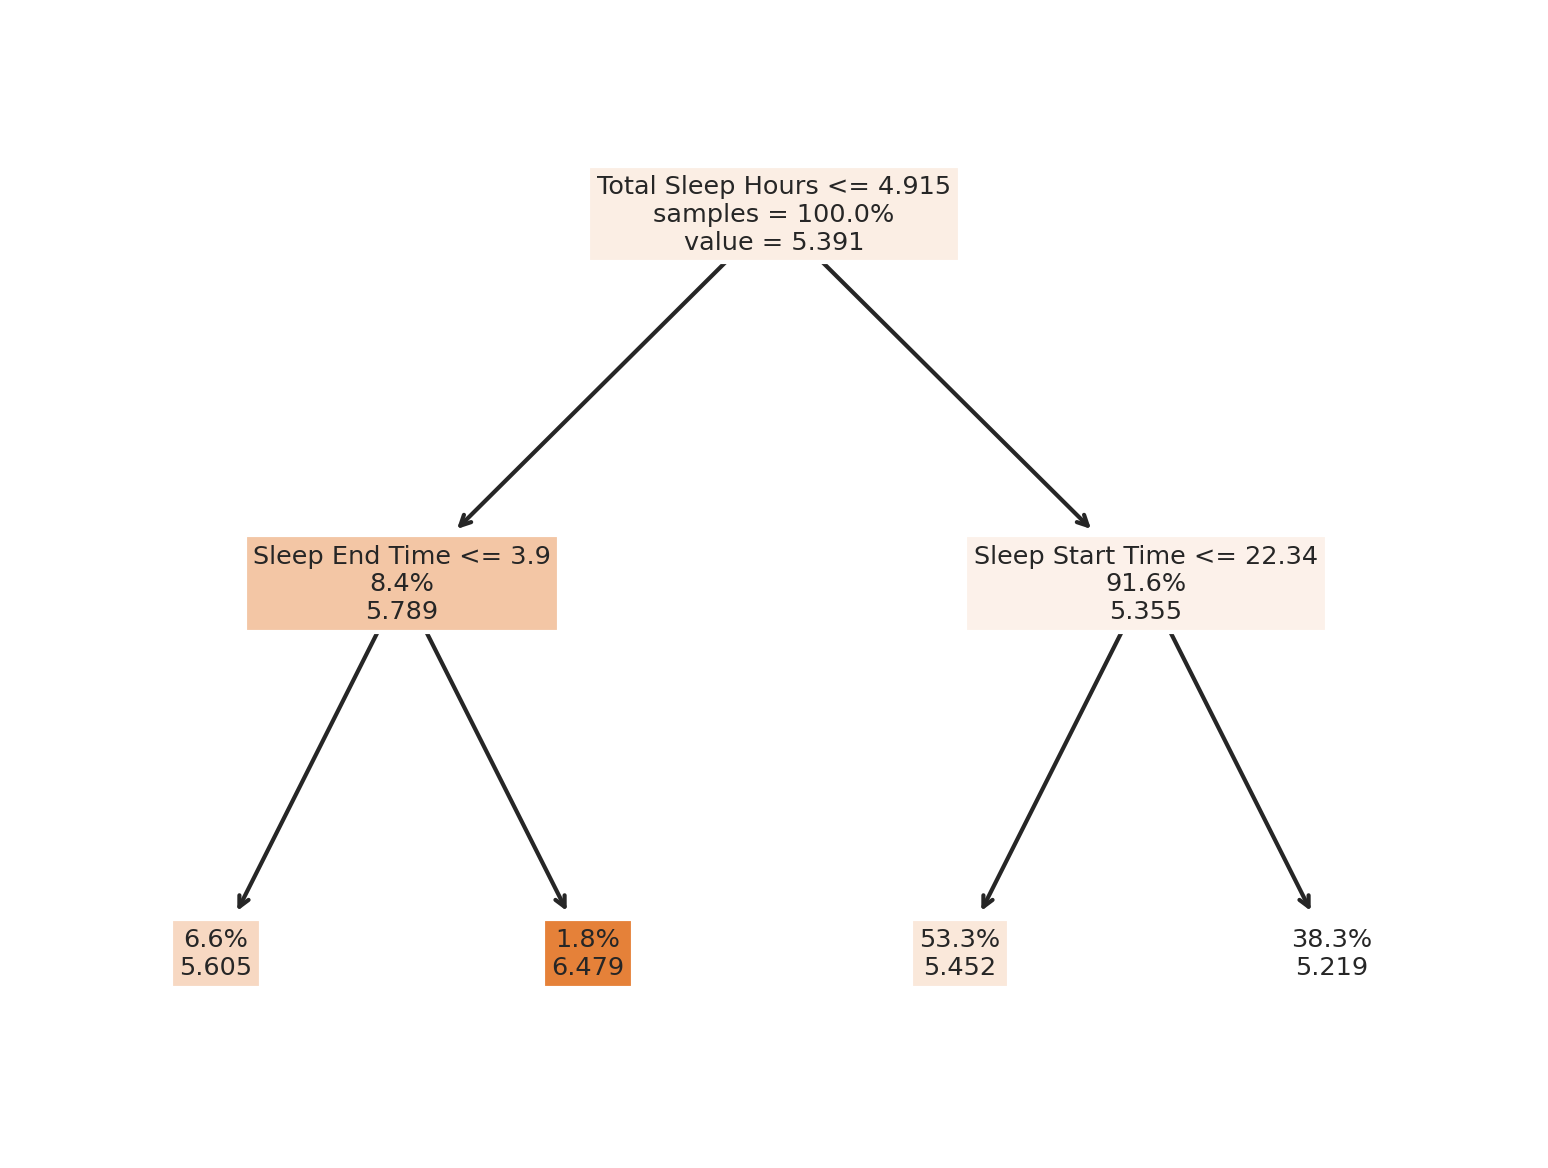

In [13]:
def predict_mood(sleep_data: pd.DataFrame) -> float:
    """
    This method takes in the sleep dataset and trains a decision tree regressor model based on the sleep start time,
    sleep end time, and sleep length to predict the self-reported mood scores. It returns the model's root mean
    squared error and plots a visual representation of the decision tree. 
    """
    features = sleep_data[["Sleep Start Time", "Sleep End Time", "Total Sleep Hours"]]
    labels = sleep_data["Mood Score"]
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels,
                                                                                test_size=0.2)
    
    search = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid={"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]},
        scoring="neg_root_mean_squared_error",
        verbose=0
    )
    search.fit(features_train, labels_train)
    model = search.best_estimator_
    
    predictions = model.predict(features_test)
    rmse = root_mean_squared_error(labels_test, predictions)
    
    plt.figure(dpi=300)
    plot_tree(
        model,
        feature_names=["Sleep Start Time", "Sleep End Time", "Total Sleep Hours"],
        label="root",
        filled=True,
        impurity=False,
        proportion=True,
        rounded=False
    );
    return rmse


print("Mood RSME:", predict_mood(sleep_data))

### Load decision tree regressor model to predict productivity scores

Productivity RSME: 2.8436596174459234


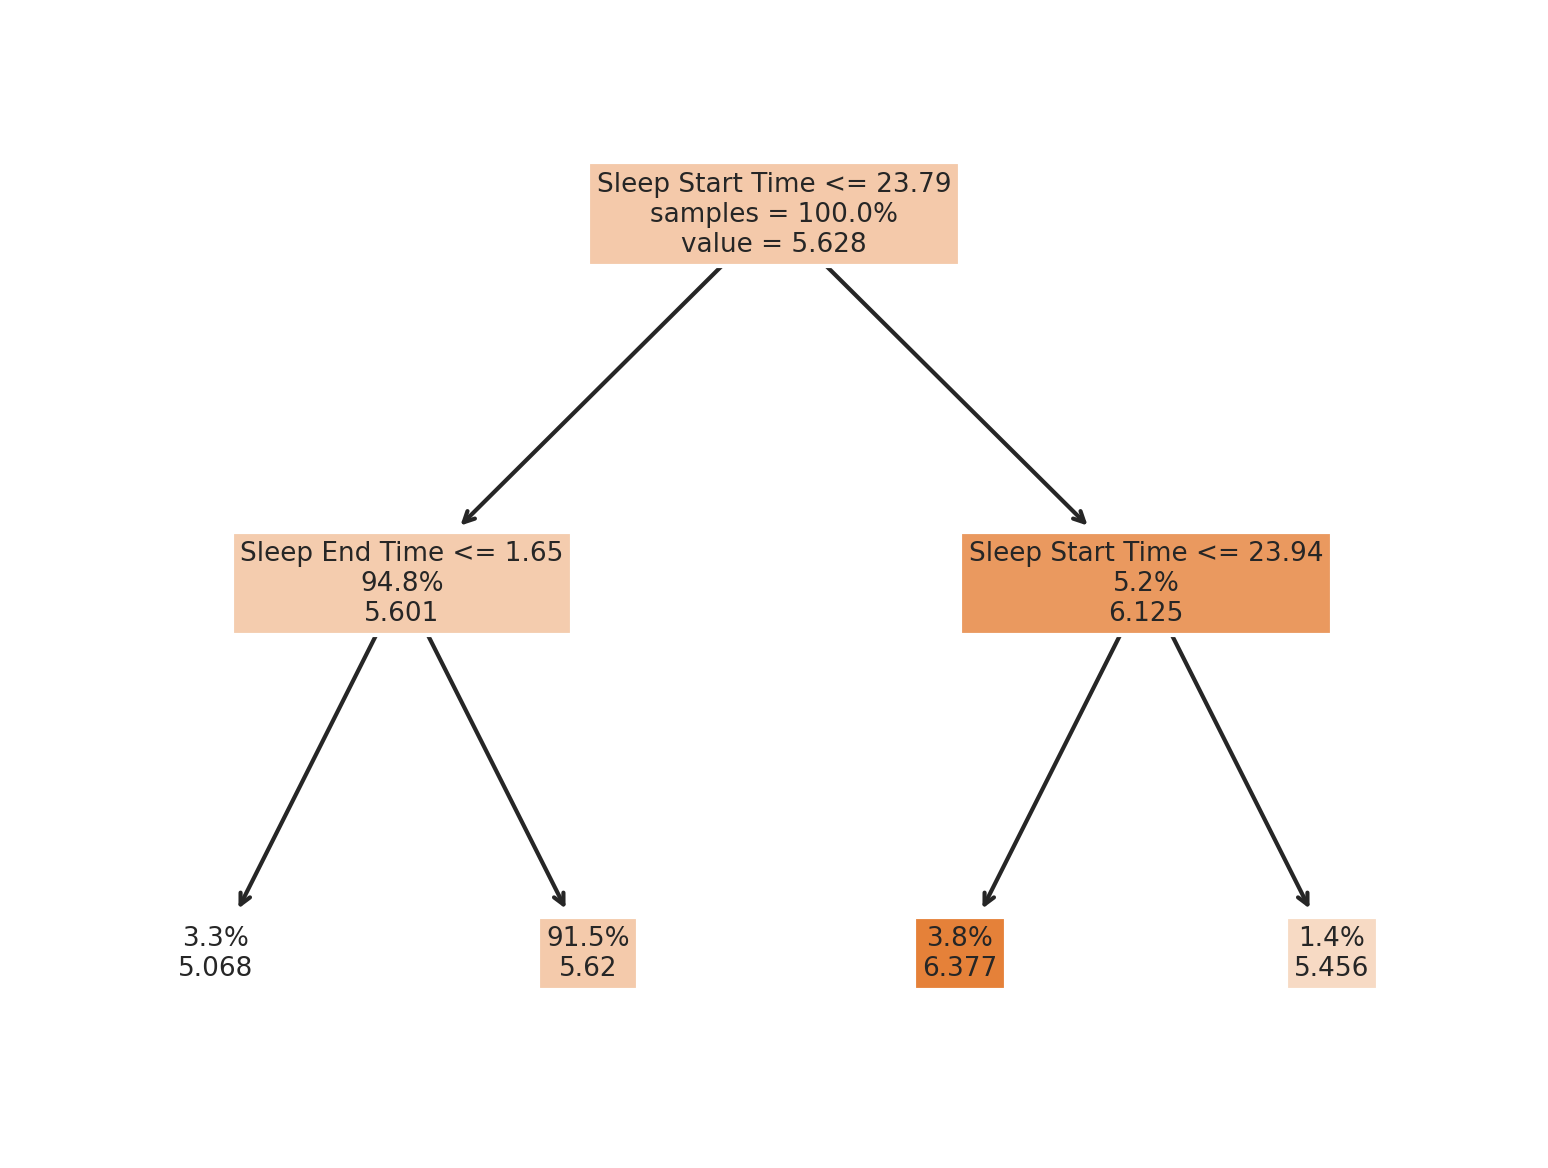

In [14]:
def predict_productivity(sleep_data: pd.DataFrame) -> float:
    """
    This method takes in the sleep dataset and trains a decision tree regressor model based on the sleep start time,
    sleep end time, and sleep length to predict the self-reported productivity scores. It returns the model's root 
    mean squared error and plots a visual representation of the decision tree. 
    """
    features = sleep_data[["Sleep Start Time", "Sleep End Time", "Total Sleep Hours"]]
    labels = sleep_data["Productivity Score"]
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels,
                                                                                test_size=0.2)
    
    search = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid={"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]},
        scoring="neg_root_mean_squared_error",
        verbose=0
    )
    search.fit(features_train, labels_train)
    model = search.best_estimator_
    
    predictions = model.predict(features_test)
    rmse = root_mean_squared_error(labels_test, predictions)

    plt.figure(dpi=300)
    plot_tree(
        model,
        feature_names=features.columns.tolist(),
        label="root",
        filled=True,
        impurity=False,
        proportion=True,
        rounded=False
    );
    return rmse


print("Productivity RSME:", predict_productivity(sleep_data))

## Implications and Limitations
The results from my research will benefit busy individals, especially students and other individuals with heavy workloads that struggle to get enough quality sleep. These individuals can benefit from my analysis of trends between lifestyle choices and sleep quality by identifying potential issues that may lead to worse sleep quality, seeing potentially optimal times to fall asleep based on the dataset, and using my models to draw relationships between certain lifestyle habits and sleep quality metrics. One of the key characteristics of many columns in the dataset is that they are self-reported on a scale from 1-10. As such, many of the datapoints I use to build my models and analyze patterns are based on subjective self-observation, which can cause the datapoints used by my models to vary heavily since the data is not standardized. As such, this led to some of my models being inaccurate. Another potential limitation of my research is that I did not split by gender and treated all genders the same when running models and analysis code. As such, potential differences due to gender were not highlighted due to the way I worked with the dataset. Similarly, the age of the individuals in the dataset wasn't recorded, meaning my research was impartial towards age. Thus, my findings failed to account for the possibly vast differences across age groups since age is a major factor of sleep quality metrics and lifestyle habits. Finally, it is important to remember that all of the relationships I am finding are correlations, and not causations, meaning another major limitation of my research is that it only detects trends and general relationships between variables, but does not guarantee that a given variable is the direct cause of an output. Thus, users should treat this dataset only as a rough informational piece rather than a serious guide on how to structure their lifestyle habits and sleep. 